In [18]:
# Import Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [19]:
# Set Up the Database engine for the Flask application to allow access to the SQLite database
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [21]:
# 1) Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# We'll begin by creating a variable to store the results of the query we'll write.
june_results = []
# To see the June date filter out all of the other data 
june_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [22]:
# 2) Convert the June temperatures to a list.
june_temps = list(np.ravel(june_results))

In [23]:
# 3) Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns =['June Temps'])

In [24]:
# 4) Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [25]:
# 5) statistics match module results

## D2: Determine the Summary Statistics for December

In [26]:
# 6) Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# We'll begin by creating a variable to store the results of the query we'll write.
december_results = []
# To see the June date filter out all of the other data 
december_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [27]:
# 7) Convert the December temperatures to a list.
december_temps = list(np.ravel(december_results))

In [28]:
# 8) Create a DataFrame from the list of temperatures for the month of December. 
df_december = pd.DataFrame(december_temps, columns=['December Temps'])

In [29]:
# 9) Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_december.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [30]:
# 10) statistics match module results

In [31]:
def precipitation():
    prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
    # write a query to get the date and precipiation from the pervious year.
    precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= prev_year).all()
    # Create a dictionary with the date as the key and the precipitation as the value.    
    precip = {date: prcp for date, prcp in precipitation}
    # To do this, we will "jsonify" our dictionary.
    # Jsonify() is a function that converts the dictionary to a JSON file.
    # When we are done modifying that data, we can push the data back to a web interface, like Flask.
    return jsonify(precip)

<AxesSubplot:xlabel='date'>

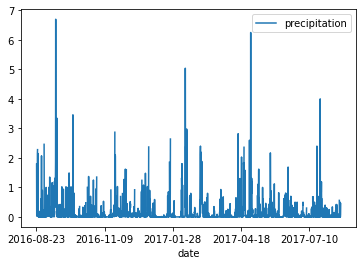

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# https://stackoverflow.com/questions/11616260/how-to-get-all-objects-with-a-date-that-fall-in-a-specific-month-sqlalchemy/31641488

#1) Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# 2) Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# 3) Perform a query to retrieve the data and precipitation scores
# We'll begin by creating a variable to store the results of the query we'll write.
results = []

# Next, let's add our session that we created earlier so that we can query our database.
# For this we'll use the session.query() function, which is how we'll begin all of our queries in SQLAlchemy.
# This is how we query a SQLite database using Python.
# The session.query() function for this query will take two parameters. 
# We will reference the Measurement table using Measurement.date and Measurement.prcp.
results = session.query(Measurement.date, Measurement.prcp)
# print(results.all())

# Since we only want to see the most recent data, we need to filter out all of the data 
# that is older than a year from the last record date.
# We'll use the filter() function to filter out the data we don't need.
# Add the filter() function to the existing query.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

# One last thing: we'll add a function that extracts all of the results from our query and put them in a list.
# To do this, add .all() to the end of our existing query. 
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)

# 4) Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

# By setting inplace=True, we're saying that we do not want to create a new DataFrame with the modified specifications. 
# If we set it to "False," then we would create a new DataFrame.
df.set_index(df['date'], inplace=True)

# Print a DataFrame with the index:
# print(df)

# Convert the DataFrame to strings, and then we'll set our index to "False."
# This will allow us to print the DataFrame without the index.

# Print a Dataframe without the index:
# print(df.to_string(index=False))

# 5) Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))

# 6) Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [33]:
# Create a new function called stats() and add parameters to the functions
def stats(start=None, end=None):
    # create a query to select the minimum, average, and maximum temperatures from our SQLite database
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    # Since we need to determine the starting and ending date, add an if-not statement to our code so we can queery our database using the list.
    if not end:
        results = session.query(*sel).\
            filter(Measurement.date >= start).all()
        temps = list(np.ravel(results))
        return jsonify(temps=temps)
    # Then, we'll unravel the results into a one-dimensional array and convert them to a list. 
    results = session.query(*sel).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))
    # Jsonify our results and return them.
    return jsonify(temps=temps)

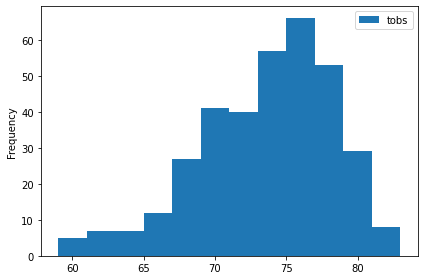

In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# To create a query, first select the column we are interested in. 
# Pull Measurement.tobs in order to get our total observations count.
# session.query(Measurement.tobs)

# Now filter out all the stations except the most active station
# with filter(Measurement.station == 'USC00519281').
# results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')

# We need to apply another filter to consider only the most recent year.
# For this we can reuse some of the code we have written previously.
# Then we'll add the .all() function to save our results as a list.

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# print(results)

# To convert the results to a DataFrame, add the following to your code:
df = pd.DataFrame(results, columns=['tobs'])


# Create the histogram, using the plot() function and the hist() function and add the number of bins as a parameter.
df.plot.hist(bins=12)

# Using plt.tight_layout() to compress the x-axis labels so that they fit into the box holding our plot.
plt.tight_layout()
